<a href="https://colab.research.google.com/github/Mariaclaracardosocampos/MVP2/blob/main/MVP2_Cyber_seguran%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Definição do Problema

O presente conjunto de dados consiste em 25 métricas variadas, em uma amostra com 40.000 registros de ataques cibernéticos, cuja análise pode encontrar padrões que auxiliem nas tomadas de decisão relacionadas a segurança de rede.

O dataset contém os seguintes atributos:
Timestamp - Registro de data e hora
Source IP Address - Endereço IP de origem
Destination IP Address - Endereço IP de destino
Source Port - Porta de origem
Destination Port - Porta de destino
Protocol - Protocolo
Packet Length - Comprimento do pacote
Packet Type - Tipo de pacote
Traffic Type - Tipo de tráfego
Payload Data - Dados de carga útil
Malware Indicators - Indicadores de malware
Anomaly Scores - Pontuações de anomalia
Alerts/Warnings - Alertas/Avisos
Attack Type - Tipo de ataque
Attack Signature - Assinatura de Ataque
Action Taken - Medida tomada
Severity Level - Nível de severidade
User Information - Informação do usuário
Device Information - Informação de dispositivo
Network Segment - Segmento de rede
Geo-location Data - Dados de geolocalização
Proxy Information - Informações de proxy
Firewall Logs - Registros de firewall
IDS/IPS Alerts - Alertas IDS/IPS
Log Source - Fonte de registro

Inicialmente as bibliotecas devem ser importadas

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Carga de dados

O pacote Pandas será utilizado (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível no Github

In [3]:
#Acessando os dados
# URL de importação do dataset
url = "https://raw.githubusercontent.com/Mariaclaracardosocampos/MVP2/main/cybersecurity_attacks.csv"

# Identificação das colunas
colunas = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port',
           'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
           'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
           'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data',
           'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']

# Leitura do arquivo
df = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Visualização das primeiras linhas do conjunto de dados
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07,2022-10-28 13:14:27,2022-05-16 17:55:43,2023-02-12 07:13:17,2023-06-27 11:02:56,2021-08-15 22:29:04
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76,198.102.5.160,97.253.103.59,11.48.99.245,49.32.208.167,114.109.149.113
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238,147.190.155.133,77.16.101.53,178.157.14.116,72.202.237.9,160.88.194.172
Source Port,31225,17245,16811,20018,6131,17430,26562,34489,56296,37918
Destination Port,17616,48166,53600,32534,26646,52805,17416,20396,20857,50039
Protocol,ICMP,ICMP,UDP,UDP,TCP,UDP,TCP,ICMP,TCP,UDP
Packet Length,503,1174,306,385,1462,1423,379,1022,1281,224
Packet Type,Data,Data,Control,Data,Data,Data,Data,Data,Control,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS,HTTP,DNS,DNS,FTP,HTTP
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...,Repellat quas illum harum fugit incidunt exerc...,Qui numquam inventore repellat ratione fugit o...,Amet libero optio quidem praesentium libero. E...,Veritatis nihil amet atque molestias aperiam m...,Consequatur ipsum autem reprehenderit quae. Do...


Para entendimento inicial do Dataset, as primeiras e ultimas colunas são visualizadas

In [4]:
# última linhas do dattaset
df.tail(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
39990,2022-03-17 12:32:16,149.46.211.219,62.75.28.249,58709,2951,TCP,227,Data,DNS,Accusantium repellat esse vitae quaerat tenetu...,...,Ignored,Medium,Yakshit Wadhwa,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Bhiwandi, Maharashtra",55.149.98.92,NaN,Alert Data,Firewall
39991,2020-11-14 05:41:54,66.200.132.243,88.211.51.78,8125,25130,ICMP,81,Control,DNS,Qui dicta occaecati tenetur recusandae. Eos re...,...,Ignored,Low,Badal Dhawan,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment A,"Sambhal, Assam",NaN,Log Data,Alert Data,Firewall
39992,2021-08-13 18:57:13,163.227.253.64,98.219.251.81,4492,20181,TCP,1010,Control,FTP,Modi nesciunt laudantium. Doloremque assumenda...,...,Ignored,Low,Miraan Guha,Mozilla/5.0 (X11; Linux i686) AppleWebKit/531....,Segment B,"Faridabad, Haryana",NaN,NaN,NaN,Server
39993,2022-09-07 00:49:00,214.124.216.123,182.116.16.113,56538,63148,ICMP,1478,Data,FTP,Voluptatem eius excepturi reiciendis. Repudian...,...,Ignored,High,Jayan Baral,Opera/9.60.(Windows NT 4.0; is-IS) Presto/2.9....,Segment C,"Solapur, Chhattisgarh",NaN,Log Data,Alert Data,Server
39994,2023-06-06 10:49:11,148.186.164.130,191.150.79.23,36782,9565,UDP,156,Data,FTP,Cum officia nostrum odit esse.\nIllum aliquid ...,...,Logged,High,Badal Batra,Mozilla/5.0 (compatible; MSIE 5.0; Windows 98;...,Segment B,"Malda, West Bengal",24.161.236.19,Log Data,NaN,Firewall
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server
39999,2023-10-10 11:59:52,14.102.21.108,109.198.45.7,50137,55575,ICMP,1175,Control,HTTP,Eligendi omnis voluptate nihil voluptatibus do...,...,Logged,Medium,Zaina Kumar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment A,"Pudukkottai, West Bengal",112.169.115.139,Log Data,Alert Data,Firewall


Inicialmente os atributos foram identificados como INPUT e OUTPUT

In [5]:
# Lista de colunas de input
colunas_input = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port',
    'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
    'Payload Data', 'Malware Indicators', 'Anomaly Scores', 'Attack Signature',
    'Severity Level', 'User Information', 'Device Information', 'Network Segment',
    'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']

# Lista de colunas de output
colunas_output = ['Alerts/Warnings', 'Attack Type', 'Action Taken']

# Estrutura de dados para os atributos de input
atributos_input = df[colunas_input]

# Estrutura de dados para a variável alvo (output)
variavel_alvo = df[colunas_output]

3.1. Estatísticas descritivas

Aqui serão examinadas as dimensões do dataset, os tipos de atributo, células não preenchidas, linhas duplicadas e atributos categóricos.

In [ ]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
desc_input = atributos_input.describe()

print(desc_input)

# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
desc_output = variavel_alvo.describe()

print(desc_output)

        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000
        Alerts/Warnings Attack Type Action Taken
count             19933       40000        40000
unique                1           3            3
top     Alert Triggered        DDoS      Blocked
freq              19933       13428        13529


Analise do resumo estatístico
a partir da descrição do conjunto de dados é possivel observar a distribuíção uniforme. E em relação ao desvio padrão não foram identificadas anomalias, o desvio se manteve abaixo da média em todas as colunas, indicando que os dados não são voláteis. Posteriormente visualizações serão geradas, onde será possível identificar com clareza

In [ ]:
# Dimensões do conjunto de dados
print(df.shape)

(40000, 25)


In [ ]:
# Informações do dataset
print(atributos_input.info())

print(variavel_alvo.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Attack Signature        40000 non-null  object 
 13  Severity Level          40000 non-null  object 
 14  User Information        40000 non-null

In [ ]:
#Tipos de dados dos atributo do dataset
atributos_input.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Attack Signature           object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

In [ ]:
#Tipos de dados dos atributo do dataset
variavel_alvo.dtypes

Alerts/Warnings    object
Attack Type        object
Action Taken       object
dtype: object

Ao buscar as informações do Dataset foram identificadas muitas colunas do tipo object, indicando a presença de dados de texto que deverão ser verificados para identificar a presença de variáveis categoricas

In [ ]:
#Contagem de linhas duplicadas
df.duplicated().sum()

0

Não foi constatada a presença de dados duplicados no dataset

In [ ]:
#Contagem de linhas nulas
variavel_alvo.isnull().sum()

Alerts/Warnings    20067
Attack Type            0
Action Taken           0
dtype: int64

In [ ]:
#Contagem de linhas nulas
atributos_input.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Attack Signature              0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Os dados nulos serão tratados posteriormente, na etapa de tratamento e limpeza

A fim de encontrar possíveis atributos categoricos o método df.nunique() foi executado, para a contagem de valores únicos por coluna, em seguida, as colunas que continham poucos valores únicos por coluna tiveram seus atributos visualizados através do métoodo df.['coluna']unique().

In [ ]:
#Contagem de valores únicos em cada coluna
variavel_alvo.nunique()

Alerts/Warnings    1
Attack Type        3
Action Taken       3
dtype: int64

In [ ]:
#Contagem de valores únicos em cada coluna
atributos_input.nunique()


Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Attack Signature              2
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
dtype: int64

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Log Source'].unique()

array(['Server', 'Firewall'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Packet Type'].unique()

array(['Data', 'Control'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Protocol'].unique()

array(['ICMP', 'UDP', 'TCP'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Packet Type'].unique()

array(['Data', 'Control'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Traffic Type'].unique()

array(['HTTP', 'DNS', 'FTP'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Malware Indicators'].unique()

array(['IoC Detected', nan], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Attack Signature'].unique()

array(['Known Pattern B', 'Known Pattern A'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Severity Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Network Segment'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Attack Type'].unique()

array(['Malware', 'DDoS', 'Intrusion'], dtype=object)

In [ ]:
#Obtenção dos valores únicos de uma coluna
df['Action Taken'].unique()

array(['Logged', 'Blocked', 'Ignored'], dtype=object)

##### 3. Pré-Processamento de dados

Etapa que consiste na preparação e organização dos dados brutos para que possam ser mais facilmente compreendidos e utilizados por algoritmos de machine learning.

######3.1. Tratamento de Missings e Limpeza

In [8]:
#salvando um NOVO dataset para tratamento

# recuperação os nomes das colunas
col = list(df.columns)

# Salvar em um arquivo CSV
df.to_csv('cyber_seguranca_transformado.csv', index=False)


In [ ]:
# verificando nulls no dataset
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

<Axes: >

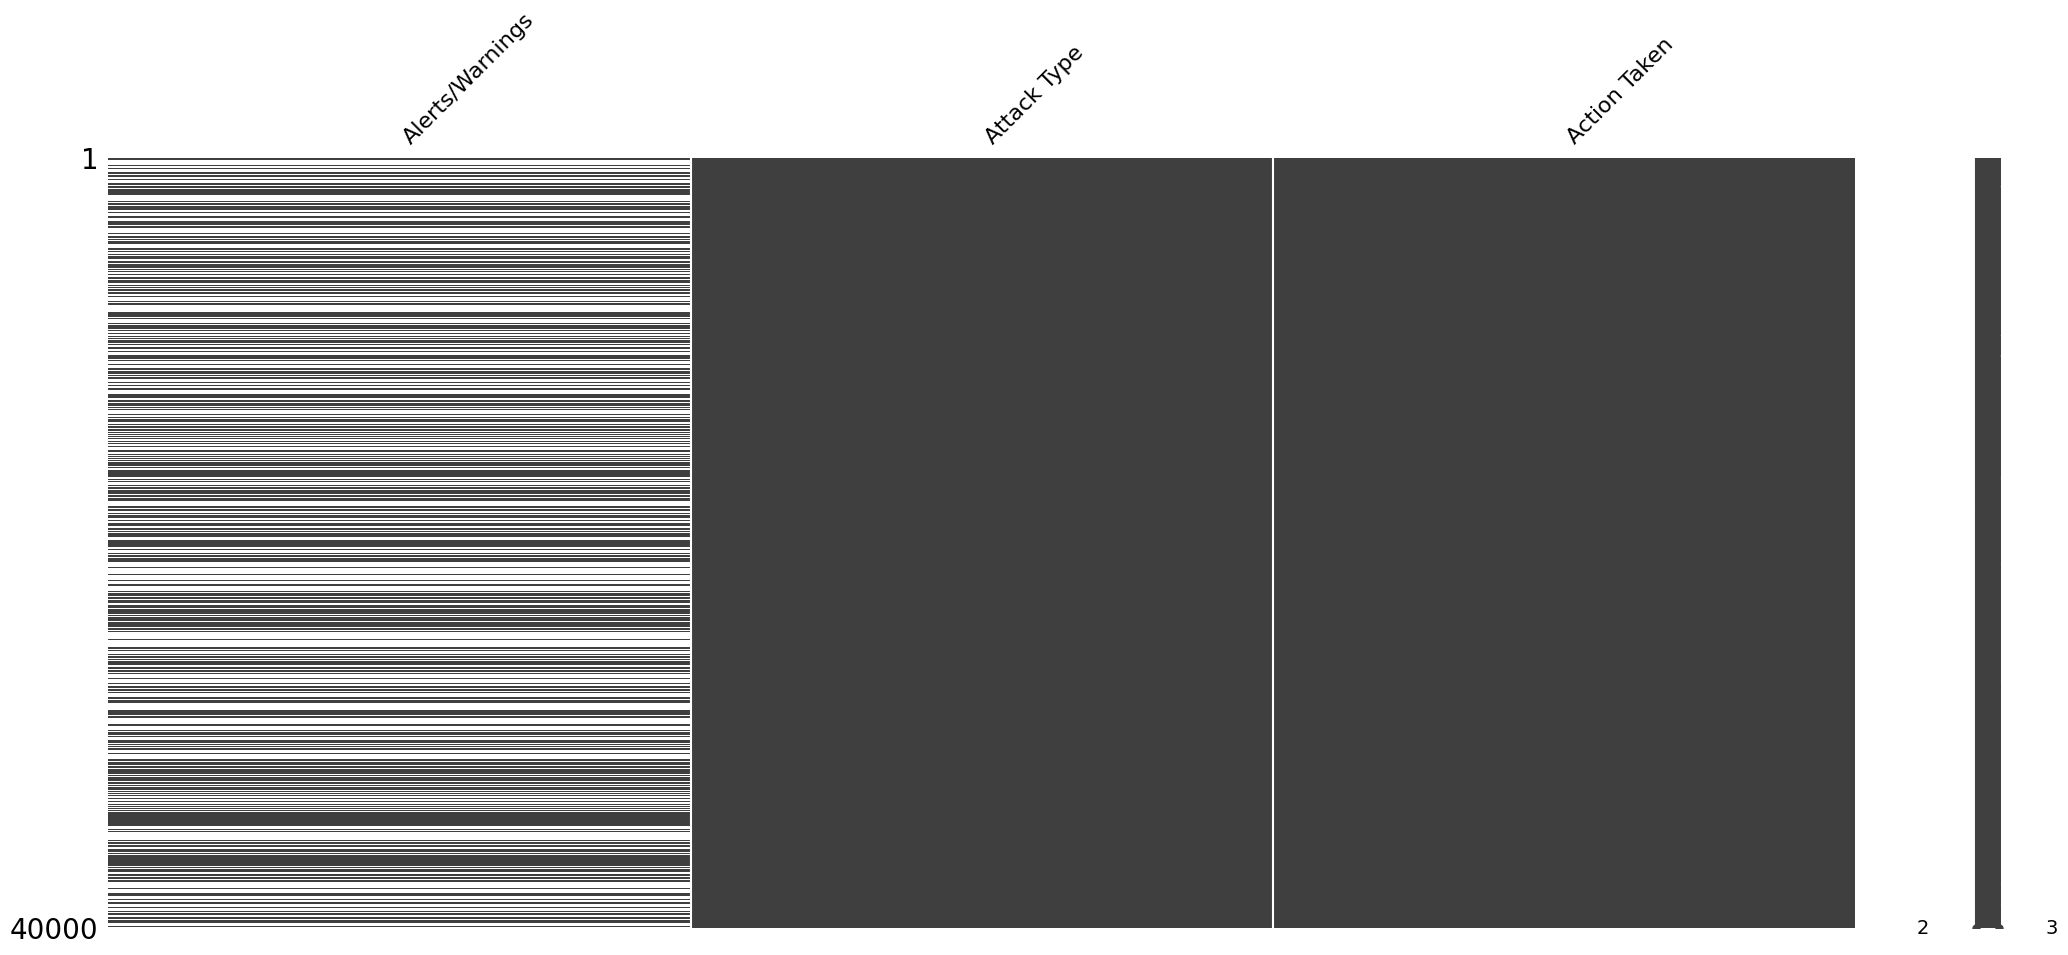

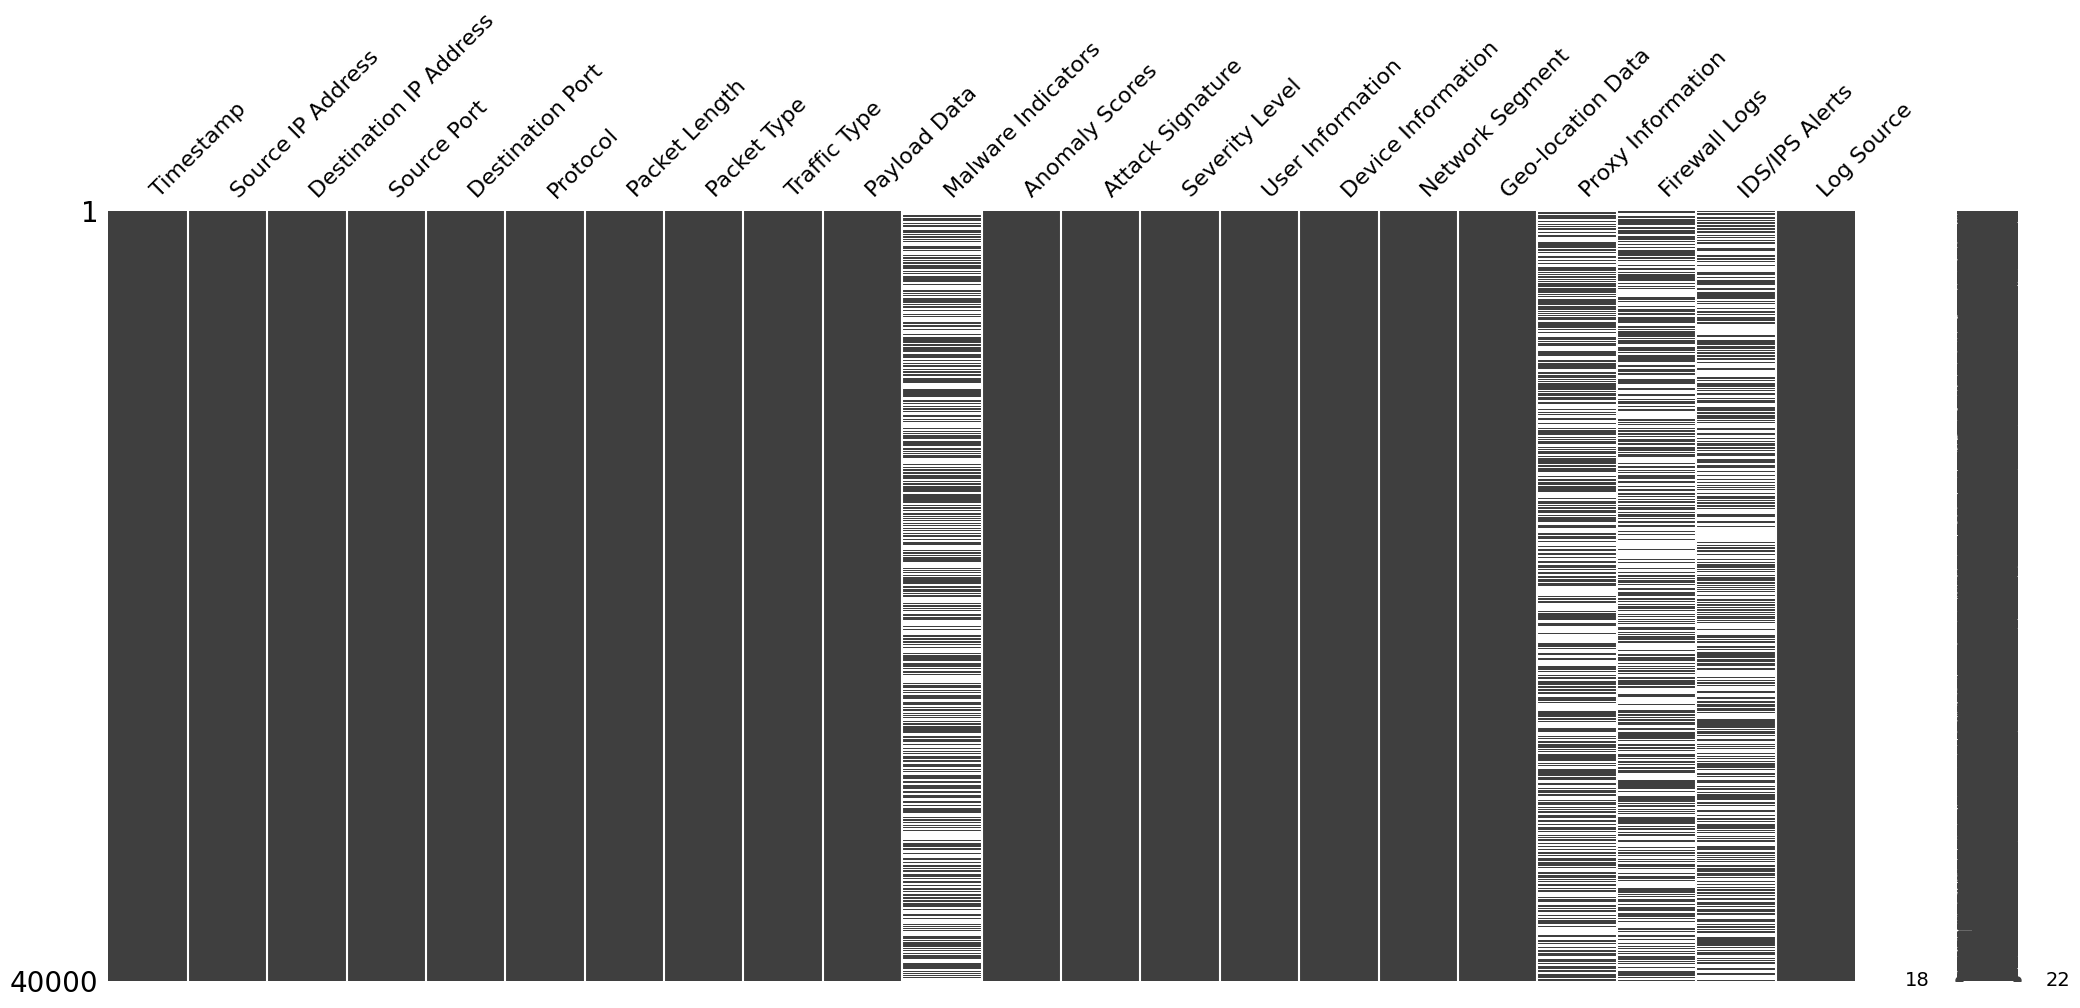

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(variavel_alvo)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos_input)

Em relação aos missings, foi cogitada a idéia do uso da moda para imputação dos valores, no entanto,  no contexto do conjunto de dados, os valores nulos encontrados ainda são relevantes pois essas linhas também podem indicar a incidencia de ataques anônimos e silenciosos

###### 3.2.Tratamento dos dados categoricos
Inicialmente o método nunique() será usado para identificar quais variáveis poderiam ser categóricas.

O critério utilizado para conversão de uma variável object para category foi a contagem de valores únicos dentro de cada atributo. Atributos com poucos valores únicos serão explorados.

In [ ]:
#Visualizando os tipos de atributo do dataset
df.dtypes

Timestamp                 datetime64[ns]
Source IP Address                 object
Destination IP Address            object
Source Port                        int64
Destination Port                   int64
Protocol                        category
Packet Length                      int64
Packet Type                     category
Traffic Type                    category
Payload Data                      object
Malware Indicators                object
Anomaly Scores                   float64
Alerts/Warnings                   object
Attack Type                     category
Attack Signature                category
Action Taken                    category
Severity Level                  category
User Information                  object
Device Information                object
Network Segment                 category
Geo-location Data                 object
Proxy Information                 object
Firewall Logs                     object
IDS/IPS Alerts                    object
Log Source      

In [ ]:
#Contagem de valores únicos em cada coluna
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            1
Anomaly Scores             9826
Alerts/Warnings               1
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Device Information        32104
Network Segment               3
Geo-location Data          8723
Proxy Information         20148
Firewall Logs                 1
IDS/IPS Alerts                1
Log Source                    2
Year                          4
Month                        12
Day                          31
Hour                         24
Network Segment               3
dtype: int64

In [18]:
#Conversão da coluna Timestamp do tipo object para datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Extração dos componentes temporais
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

#Conversão das variáveis do tipo Object para Category
df['Protocol'] = df['Protocol'].astype('category')
df['Packet Type'] = df['Packet Type'].astype('category')
df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Attack Type'] = df['Attack Type'].astype('category')
df['Attack Signature'] = df['Attack Signature'].astype('category')
df['Action Taken'] = df['Action Taken'].astype('category')
df['Severity Level'] = df['Severity Level'].astype('category')
df['Network Segment'] = df['Network Segment'].astype('category')
df['Log Source'] = df['Log Source'].astype('category')

In [ ]:
#Visualizando os tipos de atributo depois da conversão
variavel_alvo.dtypes

Alerts/Warnings    object
Attack Type        object
Action Taken       object
dtype: object

In [ ]:
#Visualizando os tipos de atributo depois da conversão
atributos_input.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Attack Signature           object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

Uma vez que as variáveis foram convertidas para 'Category' a transformação One-Hot Encoding será executada, a técnica consiste de representação de variáveis categóricas em um formato que pode ser utilizado por algoritmos de aprendizado de máquina para melhorar a eficácia do treinamento do modelo.

### 4. Análise de dados

In [9]:
# Especificando as colunas que serão codificadas
colunas_categoricas = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source']

# Aplicando a codificação one-hot usando get_dummies
df_encoded = pd.get_dummies(df, columns=colunas_categoricas)

# Visualizando o DataFrame após a codificação
print(df_encoded.head())

# Salvar em um arquivo CSV
df.to_csv('cyber_seguranca_transformado.csv', index=False)

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port  Packet Length  \
0             17616            503   
1             48166           1174   
2             53600            306   
3             32534            385   
4             26646           1462   

                                        Payload Data Malware Indicators  \
0  Qui natus odio asperiores nam. Optio nobis ius...       IoC Detected   
1  Aperiam quos modi officiis veritatis rem. Omni...       IoC Detected   
2  Perferendis sapiente vitae soluta. Hic delectu...       IoC De

####4.1. Visualizações unimodais

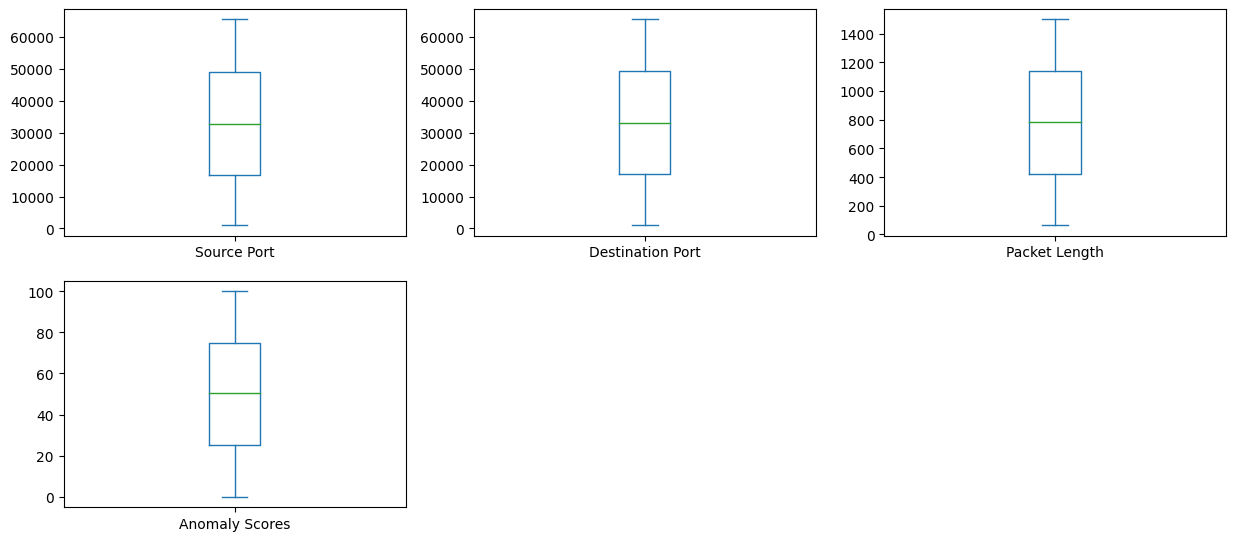

In [10]:
# Boxplot - Distribuíção das colunas
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
#Exibição do gráfico
plt.show()

Não foram encontrados outliers nas distribuíções calculadas

---



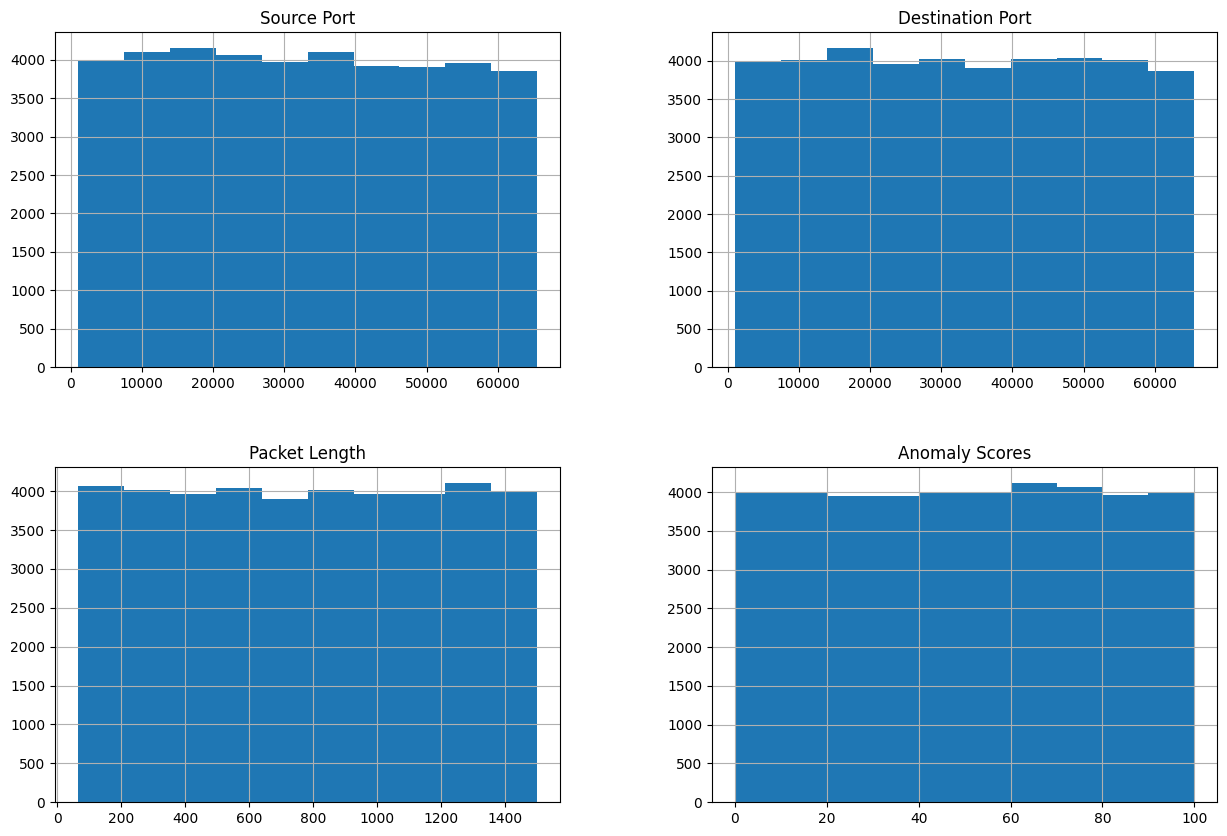

In [11]:
# Histogramas
atributos_input.hist(figsize = (15,10))
#Exibição do gráfico
plt.show()

A partir da visualização dos gráficos de densidade é possível identificar a distribuíção uniforme das colunas do dataset



#####4.2. Visualizações Multimodais

<ipython-input-14-3d939488f156>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(atributos_input.corr(), annot=True, cmap='RdBu');


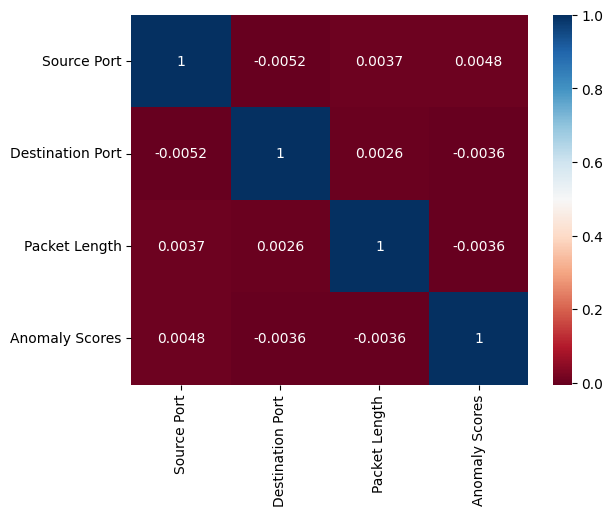

In [14]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(atributos_input.corr(), annot=True, cmap='RdBu');

Nenhuma correlação forte foi identificada. As colunas 'Anomaly Scores' e 'Source Port' apresentaram correlação fraca, assim como as colunas 'Source Port' e 'Packet Length'.

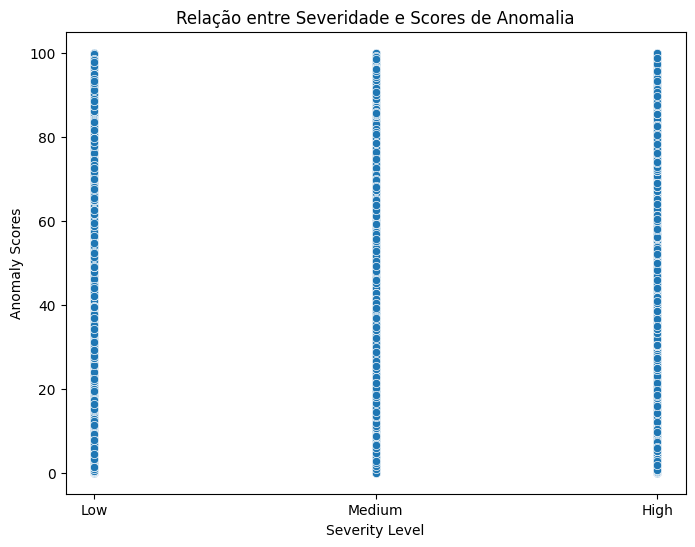

In [15]:
# Distribuíção por nível de severidade e Score de anomalia
plt.figure(figsize=(8, 6))
sns.scatterplot(y='Anomaly Scores', x='Severity Level', data=df)
plt.title('Relação entre Severidade e Scores de Anomalia')
plt.ylabel('Anomaly Scores')
plt.xlabel('Severity Level')
#Exibição do gráfico
plt.show()



O gráfico de distribuíção por nível de severidade e Score de anomalia foi elaborado buscando averiguar se havia correlação entre as variáveis, não foi identificada nenhuma correlação, todos os níveis de severidade (baixo, medio e alto) possuem distribuíção uniforme dos valores de score de anomalia.

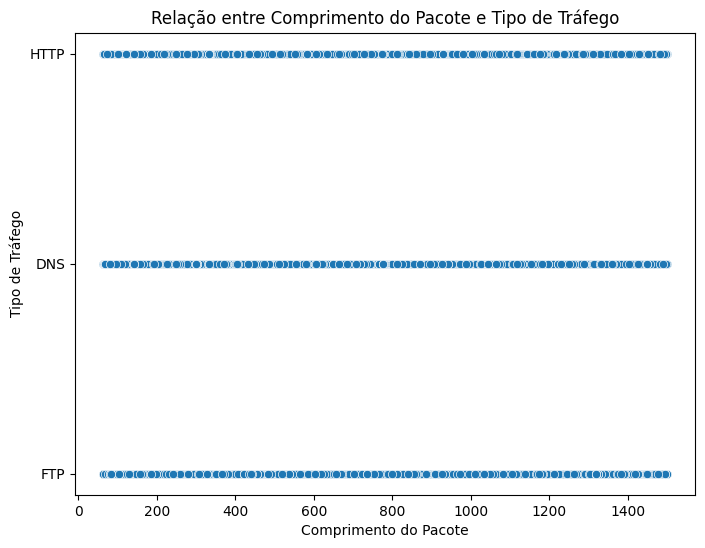

In [16]:
# Distribuíção entre o tamanho do pacote e o tipo de tráfego
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Packet Length', y='Traffic Type', data=df)
plt.title('Relação entre Comprimento do Pacote e Tipo de Tráfego')
plt.xlabel('Comprimento do Pacote')
plt.ylabel('Tipo de Tráfego')
#Exibição do gráfico
plt.show()


O gráfico da distribuíção entre o tamanho do pacote e o tipo de tráfego foi elaborado buscando averiguar se havia correlação entre as variáveis, não foi identificada nenhuma correlação, todos os tipos de protocolo contemplam diversos tamanhos.

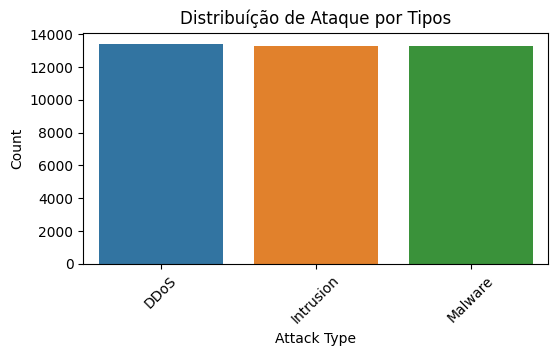

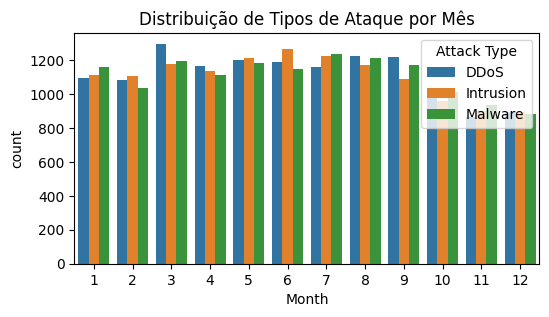

In [19]:
#Distribuíção dos tipos de ataque
attack_counts = df['Attack Type'].value_counts()
plt.figure(figsize=(6,3))
sns.barplot(x=attack_counts.index , y=attack_counts)

plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Distribuíção de Ataque por Tipos')
plt.xticks(rotation=45)

#Exibição do gráfico
plt.show()

#Tipos de ataques por mês
plt.figure(figsize=(6,3))
sns.countplot(x='Month', hue='Attack Type', data=df)
plt.title('Distribuição de Tipos de Ataque por Mês')
#Exibição do gráfico
plt.show()


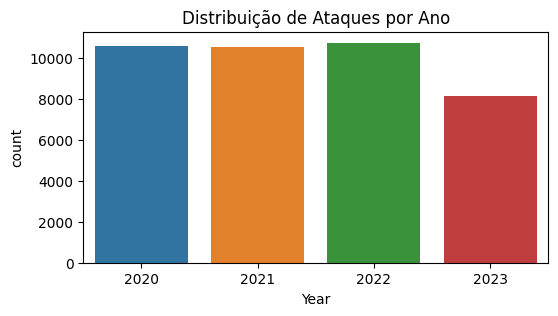

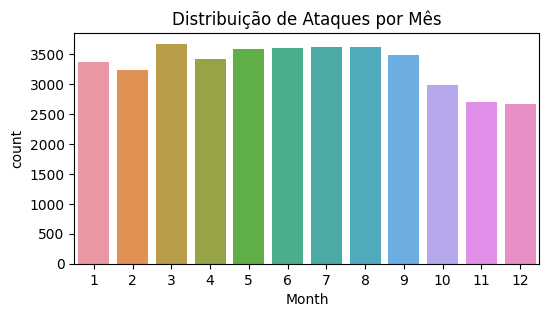

In [20]:
#Visualização geral da distribuição temporal de ataque
plt.figure(figsize=(6,3))
sns.countplot(x='Year', data=df)
plt.title('Distribuição de Ataques por Ano')
#Exibição do gráfico
plt.show()

plt.figure(figsize=(6,3))
sns.countplot(x='Month', data=df)
plt.title('Distribuição de Ataques por Mês')
#Exibição do gráfico
plt.show()

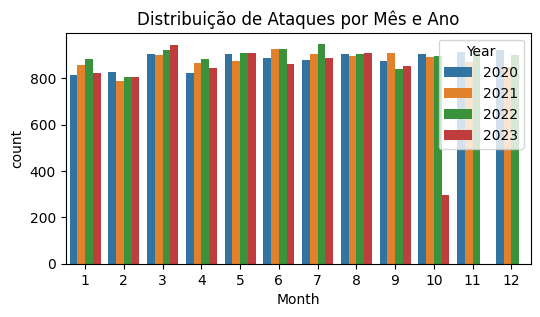

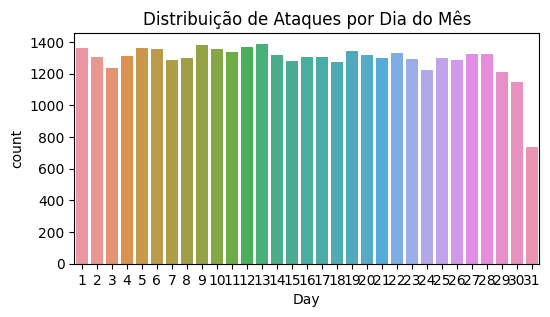

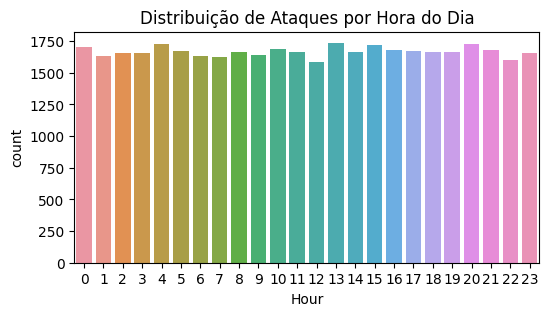

In [22]:
#Busca por tendências mensais, diárias ou horárias
plt.figure(figsize=(6,3))
sns.countplot(x='Month', hue='Year', data=df)
plt.title('Distribuição de Ataques por Mês e Ano')
#Exibição do gráfico
plt.show()

#Busca por tendências diárias
plt.figure(figsize=(6,3))
sns.countplot(x='Day', data=df)
plt.title('Distribuição de Ataques por Dia do Mês')
#Exibição do gráfico
plt.show()

 #Busca por tendências horárias
plt.figure(figsize=(6,3))
sns.countplot(x='Hour', data=df)
plt.title('Distribuição de Ataques por Hora do Dia')
#Exibição do gráfico
plt.show()


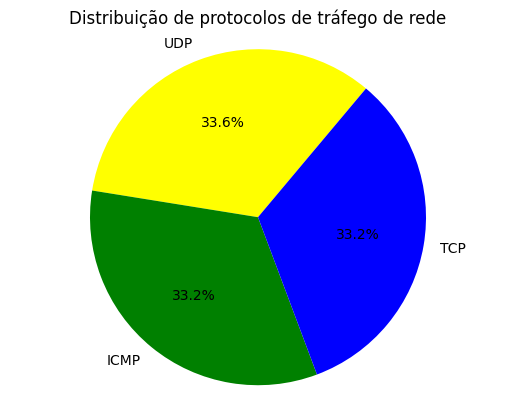

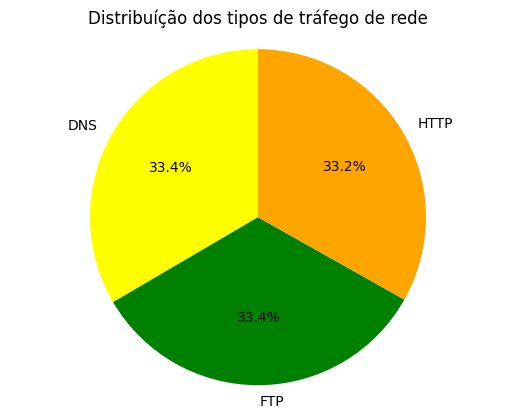

In [23]:
# Visualização da distribuíção dos protocolos de tráfego de rede
labels = ['UDP', 'ICMP', 'TCP']
sizes = df['Protocol'].value_counts()
colors = ['yellow', 'green', 'blue']
explode = (0, 0, 0)

# Criação do gráfico
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=50)
plt.axis('equal')
plt.title('Distribuição de protocolos de tráfego de rede')

#Exibição do gráfico
plt.show()

#Visualização da distribuíção dos tipos de tráfego de rede
labels =['DNS','FTP','HTTP']
sizes = df['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0, 0, 0)

#Criação do gráfico
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuíção dos tipos de tráfego de rede')

#Exibição do gráfico
plt.show()




A partir das visualizações foi possível identificar que cada valor se apresenta em igual proporção

4.2. Separação em conjunto de treino e conjunto de teste

In [24]:
# X são as features (input) e y é a variável alvo (output)
X = df[colunas_input]
y = df[colunas_output]

# Divisão dos dados (80% para treinamento, 20% para teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Conclusão

O fato de todas essas colunas terem cada valor em igual proporção é uma pista de que se trata de dados sintéticos, pois difícil produzir dados sintéticos com distribuições realistas